<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 1.0 !important; }</style>';
</script>
<!--# STAT 207: Data Science Exploration-->

# Unit 15: Logistic Regression - Part 1

## <u>Case Study</u>: Modelling Approval for the President's Foreign Policy with Age and Sex

We would now like to model the following response variable with the following two explanatory variables.
* <u>response</u>: approval of the president's foreign policy (approve vs. disapprove)
* <u>explanatory</u>:
    - sex
    - age
    
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Analyses for Associations

#### See Unit 15 slides (section 1)

## 2. Association Analyses Summary: Numerical(s) and Categorical(s) Explanatory Variables-> Categorical Response Variable (with 2 levels)

#### See Unit 15 slides (section 2)

## 3. Why should we not use a linear regression to model a categorical response variable?

#### See Unit 15 slides (section 3)

Let's again examine our random sample of adults living in the U.S. (from 2017) from Pew Research. We will just use three variables for this analysis, so we will just create a dataframe using these three variables.

In [2]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
#
df = pd.read_csv('Feb17public.csv', na_values=missing_values)[['age','sex','q5cf1']]
df.head()

,age,sex,q5cf1
0,80.0,Female,NaN
1,70.0,Female,Disapprove
2,69.0,Female,Disapprove
3,50.0,Male,NaN
4,70.0,Female,Disapprove


In [3]:
df.shape

(1503, 3)

We will drop all missing values from the dataframe.

In [4]:
df=df.dropna()
df.head()

,age,sex,q5cf1
1,70.0,Female,Disapprove
2,69.0,Female,Disapprove
4,70.0,Female,Disapprove
6,89.0,Female,Disapprove
7,92.0,Female,Approve


The q5cf1 variable represents the answers to the question "Do you approve or disapprove of the way Donald Trump is handling the nation's foreign policy?"

**<u>Potential Bias Warning!</u>** It looks like only 691 respondants out of the 1503 surveyed responded to this question. These 691 people may have had a strong opinion on the question and thus chose to answer it. So it is possible that this sample of 691 respondants is not entirely representative of all adults living in the U.S. (the population we would like to make inferences about).

In [5]:
df.shape

(691, 3)

In [6]:
df['q5cf1'].value_counts()

Disapprove    442
Approve       249
Name: q5cf1, dtype: int64

### 3.1. Let's first examine the relationship between age and approval for the president's foreign policy in 2017 in the sample.

By looking at the box plots below, the median age of those that approved was over 10 years higher than the median age of those that did not approve.

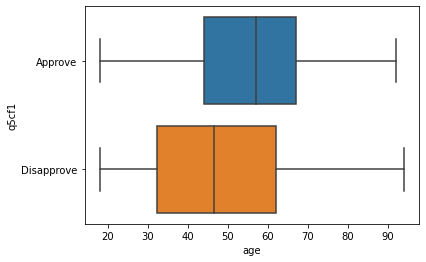

In [7]:
sns.boxplot(x='age', y='q5cf1', data=df, order=['Approve','Disapprove'])
plt.show()

### 3.2. Translate the Categorical Variable into a Numerical Variable

Because we were interested in the relationship between a categorical variable and numerical variable, side-by-side boxplots (or side-by-side violin plots) tends to be one of the best visualizations for respresenting any association between the two variables. However, if we would like to try to plot a best fit line for the relationship between these two variables (like what we do in linear regression) we will need to first tranlate our categorical variable into a numerical variable.

Below we create a new variable 'y' in our dataframe in which all 'approve' values for q5cf1 are translated into a 1 and all 'disapprove' values for q5cf1 are translated into a 0.

The **.map()** function allows us to make this translation.

In [8]:
df['y']=df['q5cf1'].map({'Disapprove':0,'Approve':1})
df.head()

,age,sex,q5cf1,y
1,70.0,Female,Disapprove,0
2,69.0,Female,Disapprove,0
4,70.0,Female,Disapprove,0
6,89.0,Female,Disapprove,0
7,92.0,Female,Approve,1


In general, we call 

* the level in which y=1 the **success level** of the response variable (ie. the level that we are interested in) and
* the level in which y=0 the **failure level** of the response variable (ie. the level that we are not interested in).


### 3.3 What's wrong wit fitting a best fit <u>line</u> to this data?

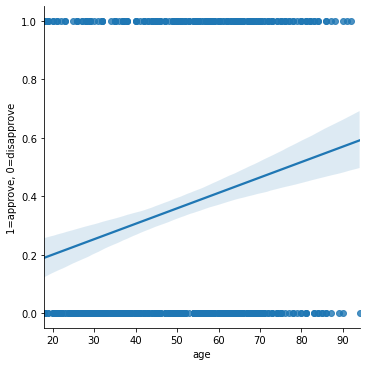

In [9]:
sns.lmplot(x="age", y='y',data=df)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

We can see that a best fit <u>line</u> shown above does not fit this data (or application) well at all.

Here are a couple of issues we would encounter if we fit this data with a <u>line</u>.

* <u>High Error</u>:The residuals for all of our predicted points will be quite high.
* <u>Unbounded Range of a Line</u>: Because the range of a line is $(\infinity,\infinity)$, this line will go above 1 and below 0. So what would that mean to this problem???

In general, because we only defined two values y=1 and y=0 that have any actual meaning, what does it mean when our y is equal to a value that is NOT 1 or 0? 

When $y>1$ or $y<0$, we'll see that these values become more meaningless, however when $0\leq y\leq 1$, we can actually interpret meaning from these values.

## 4. What curve *can* we fit instead when we have a categorical response variable (with 2 levels)?

#### See Unit 15 slides (Section 4)

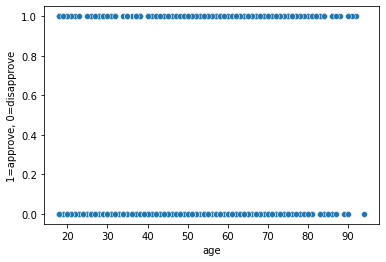

In [10]:
sns.scatterplot(x="age", y='y',data=df)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

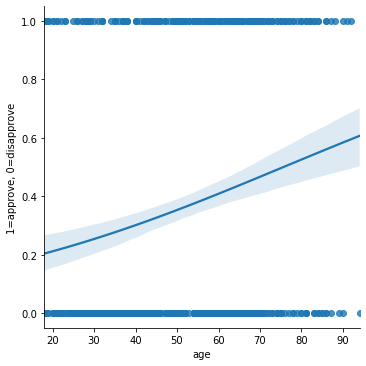

In [11]:
sns.lmplot(x="age", y='y',data=df, logistic=True)
plt.ylabel('1=approve, 0=disapprove')
plt.show()

## 5. Fitting a Simple Logistic Regression Curve

#### See unit 15 slides (section 5)

### 5.1. Fitting the Model in Python

We will continue to use the **statsmodels.formula.api** package like we used to fit our linear regression models, however, in order to fit a logistic regression model, we will now use the **smf.logit()** function.

The way that we fit a logistic regression model using the **smf.logit()** function is fit is the same as the way that we fit a linear regression model using the **smf.ols()** function *except*, we specifically need to convert our categorical response variable into a 1/0 numerical variable and use that variable in the the equation.

**Notice how this doesn't work, when we simply just use the name of the categorical response varaible q5cf1 in our dataframe.**

In [12]:
mod1 = smf.logit(formula='q5cf1 ~ age', data=df).fit()
mod1.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (691, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

**We must use that 1/0 y variable that we translated from q5cf1 before.**

In [13]:
mod1 = smf.logit(formula='y ~ age', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.633703
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      689
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.03047
Time:                        13:42:39   Log-Likelihood:                -437.89
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 1.553e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7872      0.254     -7.023      0.000      -2.286      -1.288
age            0.0236      0.005      5.128      0.000       0.015       0.033
==============================================================================
"""

### 5.2 Formulating the Logistic Regression Equation

Our logistic regression model (from our maximum likelihood estimation calculations) is as follows.

$log(\frac{\hat{p}}{1-\hat{p}}) = -1.7872+0.0236age$

<u>Notation</u>:
* Make sure to put a hat over the predictive probability p to indicate that this is a prediction.
* Put the variables into words.


## 6. Fitting a Multiple Logistic Regression Curve

#### See Unit 15 slides (section 6)

We can incorporate multiple explanatory variables into our logistic regression equation like we did for our multiple linear regression models.

In [14]:
mod1 = smf.logit(formula='y ~ age+sex', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.612754
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                 0.06252
Time:                        13:42:39   Log-Likelihood:                -423.41
converged:                       True   LL-Null:                       -451.65
Covariance Type:            nonrobust   LLR p-value:                 5.457e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3609      0.288     -8.190      0.000      -2.926      -1.796
sex[T.Male]     0.8856      0.167      5.296      0.000       0.558       1.213
age             0.0260      0.005      5.466      0.000       0.017       0.035
===============================================================================
"""

By incorporating sex as an explanatory variable as well (which gets translated into one 1/0 indicator variable sex[T.Male]), our new logistic regression model is as follows.

$log(\frac{\hat{p}}{1-\hat{p}}) = -2.3609+0.8856sex[T.Male]+0.0260age$

## 7. Making Predictions with a Logistic Regression Model

#### See Unit 15 slides (section 7)

### 7.1 Use this logistic regression model to predict the <u>log-odds</u> that a 20 year old female supports the president's foreign policy in this sample.

We can do this by hand.
$log(\frac{\hat{p}}{1-\hat{p}}) = -2.3609+0.8856(0)+0.0260(20) =-1.8409$


In [15]:
-2.3609+0.8856*(0)+0.0260*(20)

-1.8409

### 7.2 Use this logistic regression model to predict the <u>odds</u> that a 20 year old female supports the president's foreign policy in this sample.

Let's translate this prediction into something more meaningful. We can exponentiate both sides of our prediction equation to get the <u>odds</u> that this 20-year-old female supports the president's foreign policy.

$e^{log(\frac{\hat{p}}{1-\hat{p}})} = e^{-1.8409}$

$odds=\frac{\hat{p}}{1-\hat{p}} = .15867$


In [16]:
odds=np.exp(-1.8409)
odds

0.15867455472519007

Thus the odds that a 20 year old female supports the president's foreign policy is .159 (aka: 159 to 1000).

### 7.3 Finally, let's use this logistic regression model to predict the <u>probability</u> that a 20 year old female supports the president's foreign policy in this sample.

Let's translate the odds into a probability, by using the equation $p=\frac{odds\_of\_success}{1+odds\_of\_success}$


In [22]:
prob=odds/(1+odds)
prob

0.13694488592858062

Thus the **predictive probability** that a 20 year old female supports president's foreign policy in this sample is 0.1369.

We can also do this using the Python **.predict()** function (using it in the same way that we did for linear regression models).

In [18]:
mod1.predict(exog=dict(sex='Female', age=20))

0    0.13701
dtype: float64

## 8. Interpreting the Values of $\hat{\beta}_0, \hat{\beta}_1,\hat{\beta}_2,...,\hat{\beta}_p$

#### See Unit 15 slides (section 8)

In [19]:
np.exp(-2.3609)

0.09433528322414658

In [20]:
np.exp(.0260)

1.026340948473442

In [21]:
np.exp(.8858)

2.4249235545605465

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign